In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns

sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('dark')

%matplotlib inline

# Challenge 2

Topic: Movies and Pandas  
Date: 2016/07/09  
Name: Michelle L. Gill  
Worked with: alone

In [2]:
data = pd.read_csv('../../../challenges_data/2013_movies.csv')
data.head(2)

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00


In [3]:
data['ReleaseDate'] = pd.to_datetime(data.ReleaseDate)
data['ReleaseMonth'] = data.ReleaseDate.dt.month
data['Rating'] = pd.Categorical(data.Rating, 
                                categories=['G', 'PG', 'PG-13', 'R'], 
                                ordered=True)

## Question 1

Plot domestic total gross over time.

In [4]:
resampled_data = (data[['ReleaseDate', 'DomesticTotalGross']]
                  .set_index('ReleaseDate')
                  .resample('M').median()
                  )

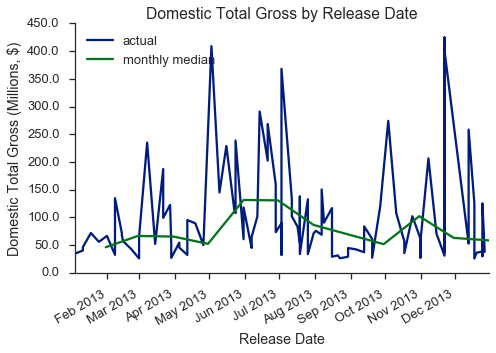

In [5]:
def scale_ticklabels(x, p):
    return "%.1f" % (x / (10 ** scale_pow))

ax = data.plot('ReleaseDate', 'DomesticTotalGross', 
               kind='line', figsize=(7,5), label='actual')
ax = resampled_data.reset_index().plot('ReleaseDate','DomesticTotalGross',
                                       kind='line',
                                       label='monthly median', ax=ax)
ax.legend(loc=0)
ax.set_xlabel('Release Date')

scale_pow = 6
ax.get_yaxis().set_major_formatter(FuncFormatter(scale_ticklabels))
ax.set_ylabel('Domestic Total Gross (Millions, $)')

ax.set_title('Domestic Total Gross by Release Date')

plt.tight_layout()
sns.despine()

## Question 2

Plot runtime vs. domestic total gross

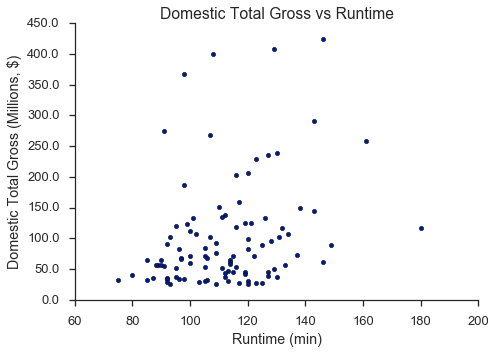

In [6]:
ax = data.plot('Runtime', 'DomesticTotalGross', 
               kind='scatter', legend=False, figsize=(7,5))

ax.set_xlabel('Runtime (min)')

scale_pow = 6
ax.get_yaxis().set_major_formatter(FuncFormatter(scale_ticklabels))
ax.set_ylabel('Domestic Total Gross (Millions, $)')

ax.set_title('Domestic Total Gross vs Runtime')

plt.tight_layout()
sns.despine()

## Question 3

Group your data by Rating and find the average runtime and domestic total gross at each level of Rating.

In [7]:
mean_by_rating = ( data
                  [['Rating', 'Runtime', 'DomesticTotalGross']]
                  .groupby('Rating')
                  .mean()
                 )
mean_by_rating

,Runtime,DomesticTotalGross
Rating,,
G,107.000000,2.684928e+08
PG,99.933333,1.311357e+08
PG-13,117.510638,1.114498e+08
R,110.729730,6.989243e+07


## Challenge 4

Make one figure with (N=the number of MPAA ratings there are) subplots, and in each plot the release date vs the domestic total gross.

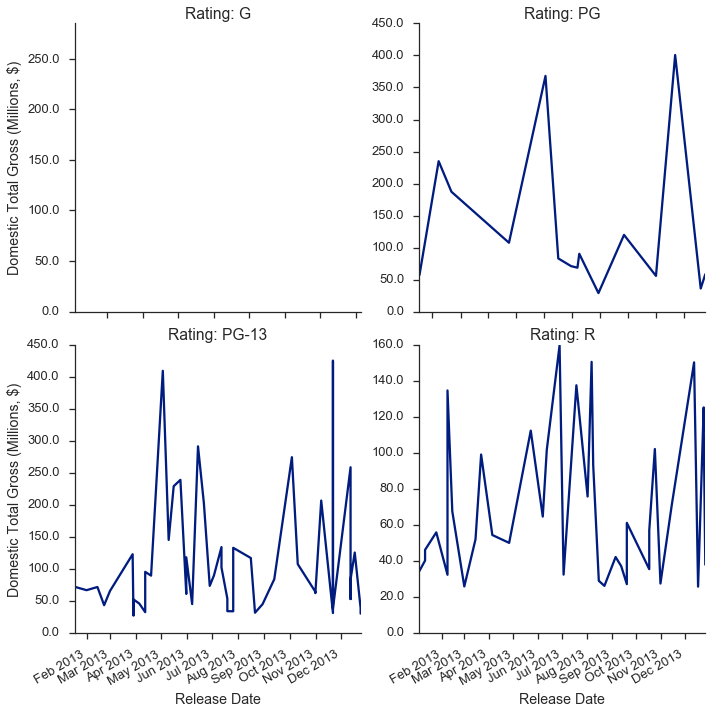

In [13]:
fig, axList = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(10, 10)

for (idx, dat), ax in zip(data.groupby('Rating'), axList.flatten()):
    dat.plot('ReleaseDate', 'DomesticTotalGross', 
             marker='', ls='-',
             ax=ax, legend=False)
    
    ax.set_title('Rating: {}'.format(idx))
    
    if ax.is_last_row():
        ax.set_xlabel('Release Date')
    else:
        ax.set_xticklabels('')
        ax.set_xlabel('')
        
    scale_pow = 6
    ax.get_yaxis().set_major_formatter(FuncFormatter(scale_ticklabels))
    ax.set_ylim(0, ax.get_ylim()[1])
    
    if ax.is_first_col():
        ax.set_ylabel('Domestic Total Gross (Millions, $)')
    else:
        ax.set_ylabel('')
        
plt.tight_layout()
sns.despine()

In [9]:
data.query('Rating=="G"')

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate,ReleaseMonth
6,Monsters University,NaN,268492764,Dan Scanlon,G,107,2013-06-21,6


## Challenge 5

What director in your dataset has the highest gross per movie?

In [10]:
( data
 [['Director', 'DomesticTotalGross']]
 .groupby('Director')
 .mean()
 .sort_values('DomesticTotalGross', ascending=False)
 .head(10)
 )

,DomesticTotalGross
Director,
Francis Lawrence,424668047
Shane Black,409013994
Chris BuckJennifer Lee,400738009
Pierre CoffinChris Renaud,368061265
Zack Snyder,291045518
Alfonso Cuaron,274092705
Dan Scanlon,268492764
Peter Jackson,258366855
Justin Lin,238679850


## Challenge 6

Bin your dataset into months and make a bar graph of the mean domestic total gross by month. Error bars will represent the standard error of the mean.

Title of graph should include: Mean Domestic Total Gross by Month in 2013

Topic for consideration: what is the correct formula for the standard error of the mean? Examine the error bars and see if they are “reasonable.”

In [11]:
def sem(data):
    return data.std(ddof=1)/np.sqrt(data.shape[0])

gross_by_month = ( data
                  [['ReleaseMonth', 'DomesticTotalGross']]
                  .groupby('ReleaseMonth')
                  .agg({'DomesticTotalGross':[np.mean, sem, len]})
                  .reset_index()
                 )

gross_by_month

ReleaseMonth DomesticTotalGross              
                              mean       sem len
0             1           49543237   6555914   5
1             2           67386013  12409272   7
2             3           96097096  24413138   9
3             4           60940719  10329105   6
4             5          177409720  39518588   8
5             6          150650005  33658260   8
6             7          105780721  26387322  12
7             8           68531263  12459149  11
8             9           61712314  14216539   6
9            10          115027038  42012719   5
10           11          137936759  48572933  10
11           12           87483385  18537593  13

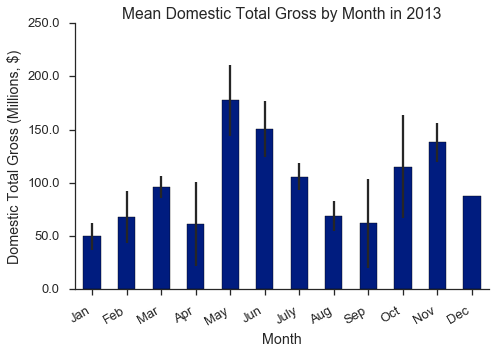

In [12]:
ax = ( gross_by_month
      .plot('ReleaseMonth', ('DomesticTotalGross','mean'), kind='bar', 
            yerr=gross_by_month.loc[:, ('DomesticTotalGross','sem')],
            legend=False, figsize=(7,5))
 )

ax.set_xlabel('Month')
ax.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun',
                    'July','Aug','Sep','Oct','Nov','Dec'])
plt.xticks(rotation=30, ha='right')

scale_pow = 6
ax.get_yaxis().set_major_formatter(FuncFormatter(scale_ticklabels))
ax.set_ylabel('Domestic Total Gross (Millions, $)')

ax.set_title('Mean Domestic Total Gross by Month in 2013')

plt.tight_layout()
sns.despine()

For standard error of the mean, I used the sample standard deviation divided by the square root of the sample size. This causes some issues with variable sample sizes because the size of the denominator affects the size of the error.